## 用两层ReLU网络模拟正弦函数y=sin(x)

epoch100的训练损失:  0.14176799898957437
epoch200的训练损失:  0.08731867860983338
epoch300的训练损失:  0.07373239306821656
epoch400的训练损失:  0.0653237903399959
epoch500的训练损失:  0.05918276793669987
epoch600的训练损失:  0.052362847639332216
epoch700的训练损失:  0.04491496841718667
epoch800的训练损失:  0.03917610708956461
epoch900的训练损失:  0.03517141278770374
epoch1000的训练损失:  0.03240340901674445
epoch1100的训练损失:  0.030290394037977023
epoch1200的训练损失:  0.028235613904423616
epoch1300的训练损失:  0.02633801847158558
epoch1400的训练损失:  0.024930691338035223
epoch1500的训练损失:  0.023829448148630635
epoch1600的训练损失:  0.022913087820811476
epoch1700的训练损失:  0.022113716470457314
epoch1800的训练损失:  0.021369160407199644
epoch1900的训练损失:  0.020666849372503654
epoch2000的训练损失:  0.020010840641349056
epoch2100的训练损失:  0.019384925356283684
epoch2200的训练损失:  0.01879647585605678
epoch2300的训练损失:  0.018236005217074188
epoch2400的训练损失:  0.017703187355354855
epoch2500的训练损失:  0.01718534022583785
epoch2600的训练损失:  0.016693856231512427
epoch2700的训练损失:  0.016224431516272

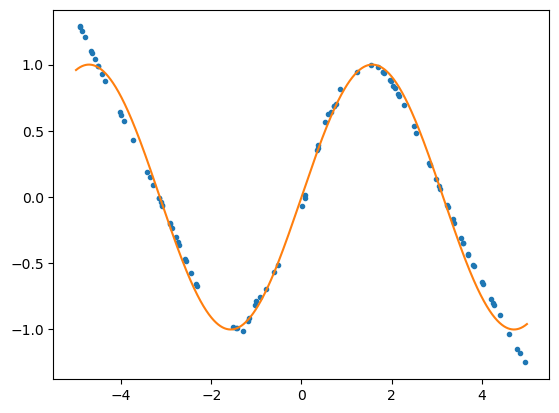

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#我们用来模拟的函数是y=sin(x)。
def myRelu(x):
    return np.where(x > 0, x, 0)

def myRelu_der(x):
    return np.where(x > 0, 1, 0)

class myModel:
    def __init__(self):
        # input.size = batch * 1
        self.Wh = np.random.randn(1, 64)    # size = 1 * 64
        self.bh = np.random.randn(64)       # size = 64
        self.W = np.random.randn(64, 1)     # size = 64 * 1
        self.b = np.random.randn(1)         # size = 1

    def forward(self, x):
        self.zh = np.dot(x, self.Wh) + self.bh
        self.hidden = myRelu(self.zh) # h = relu(zh)
        self.z = np.dot(self.hidden, self.W) + self.b

        return self.z

    def loss(self, x, y):
        loss_array = y - self.forward(x)
        return np.mean(loss_array ** 2)

    def backward(self, x, y, learning_rate):
        # 损失函数L=f(z)

        dl_dz2 = 2 * (self.z - y) / x.shape[0]

        dl_dw = np.dot(self.hidden.T, dl_dz2)
        dl_db = np.sum(dl_dz2)

        dl_dh = np.dot(dl_dz2, self.W.T)
        dl_dz1 = dl_dh * myRelu_der(self.zh)

        dl_dwh = np.dot(x.T, dl_dz1)
        dl_dbh = np.sum(dl_dz1)

        self.W -= learning_rate * dl_dw
        self.b -= learning_rate * dl_db
        self.Wh -= learning_rate * dl_dwh
        self.bh -= learning_rate * dl_dbh


    def test(self, x):
        return np.dot(myRelu(np.dot(x, self.Wh) + self.bh), self.W) + self.b


batch_size = 1000
epoch = 10000
training_dataset = {}
training_dataset['x'] = np.random.rand(batch_size, 1) * 10 - 5
training_dataset['y'] = np.sin(training_dataset['x'])

model = myModel()

for i in range(0, epoch):
    x = training_dataset['x']
    y = training_dataset['y']
    model.forward(x)

    model.backward(x, y, 0.002)
    if(i % 100 == 99):
        print(("epoch%d的训练损失: " % (i + 1)), model.loss(x, y))

test_dataset = {}
test_dataset['x'] = np.random.rand(batch_size // 10, 1) * 10 - 5 # 产生[-5, 5)的随机数
test_dataset['y_est'] = model.test(test_dataset['x'])

plt.plot(test_dataset['x'], test_dataset['y_est'], '.') #画预测值的散点图

x = np.linspace(-5, 5, 10000)
y = np.sin(x)
plt.plot(x, y) # 画正弦函数的图象

plt.show()


